In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
gan = np.load('../../experiments/runs/SHO_run_Feb252020_rayBest/train_mse.npy')
l2 = np.load('../../experiments/runs/SHO_run_Feb252020_L2Compare/train_mse.npy')
l1 = np.load('../../experiments/runs/SHO_run_Feb252020_L1Compare/train_mse.npy')
huber = np.load('../../experiments/runs/SHO_run_Feb252020_SmoothL1Compare/train_mse.npy')

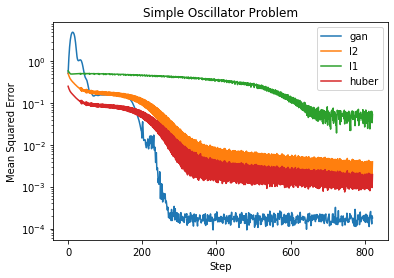

In [15]:
steps = np.arange(len(gan))
plt.plot(steps, gan, label='gan')
plt.plot(steps, l2, label='l2')
plt.plot(steps, l1, label='l1')
plt.plot(steps, huber, label='huber')
plt.legend()
plt.yscale('log')
plt.title('Simple Oscillator Problem')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error');